### 4.1 Import Modules & Declare Reused Functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.feature_extraction.text import CountVectorizer
from scipy.stats import pearsonr


C:\Users\INKY\AppData\Local\Temp\ipykernel_21632\3956927440.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Function to plot top 20 words for each metric in a subplot
def top20SubBox(ax, correlations, metric, data_type):
    # Sort words by correlation with the specified metric
    sorted_words = sorted(correlations.items(), key=lambda x: x[1][metric], reverse=True)
    
    # Extract top 20 words and their correlations
    top_20_words = [word[0] for word in sorted_words[:20]]
    top_20_correlations = [word[1][metric] for word in sorted_words[:20]]
    
    # Plot horizontal bar chart
    ax.barh(top_20_words, top_20_correlations, color='teal')
    ax.set_xlabel(f'Correlation with {metric}')
    ax.set_title(f'Top 20 {data_type} Correlated with {metric}')
    ax.invert_yaxis()

### 4.2 Import Dataset (non-bootstraped and bootstrapped)

In [3]:
# Import data and drop unnecessary columns
captionDF = pd.read_csv("Datasets/cleaned-IG-data.csv", encoding="utf-8", sep=",")
captionDF = captionDF.drop('Unnamed: 0', axis=1)

In [4]:
captionDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Impressions  119 non-null    int64 
 1   Comments     119 non-null    int64 
 2   Shares       119 non-null    int64 
 3   Likes        119 non-null    int64 
 4   Caption      119 non-null    object
 5   Hashtags     119 non-null    object
dtypes: int64(4), object(2)
memory usage: 5.7+ KB


In [5]:
bootstrappedDF = pd.read_csv("Datasets/BootstrappedAndNoOutlier.csv", encoding="utf-8", sep=",")
bootstrappedDF = bootstrappedDF.drop('Unnamed: 0', axis=1)

In [6]:
bootstrappedDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243 entries, 0 to 2242
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Impressions  2243 non-null   int64 
 1   Comments     2243 non-null   int64 
 2   Shares       2243 non-null   int64 
 3   Likes        2243 non-null   int64 
 4   Caption      2243 non-null   object
 5   Hashtags     2243 non-null   object
dtypes: int64(4), object(2)
memory usage: 105.3+ KB


### 4.3 We are using the original dataset (n=119) before bootstrapping to find the correlation between caption and `likes`, `comments`, `shares`, `impression`.

#### 4.3.1 Finding Correlation of Captions and Likes/comments/shares/impressions `(non-bootstrapped data)`.

In [7]:
# Tokenizing captions and calculating correlation with metrics
vectorizer = CountVectorizer()
document_term_matrix = vectorizer.fit_transform(captionDF['Caption'])
word_freq_df = pd.DataFrame(document_term_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Add engagement metrics to word frequency DataFrame
word_freq_df['Impressions'] = captionDF['Impressions']
word_freq_df['Comments'] = captionDF['Comments']
word_freq_df['Shares'] = captionDF['Shares']
word_freq_df['Likes'] = captionDF['Likes']

# Calculate correlations and store in a dictionary
correlations = {}
for word in vectorizer.get_feature_names_out():
    correlations[word] = {
        'Impressions': pearsonr(word_freq_df[word], word_freq_df['Impressions'])[0],
        'Comments': pearsonr(word_freq_df[word], word_freq_df['Comments'])[0],
        'Shares': pearsonr(word_freq_df[word], word_freq_df['Shares'])[0],
        'Likes': pearsonr(word_freq_df[word], word_freq_df['Likes'])[0]
    }


# Print the correlations
for word, corr in correlations.items():
    print(f"Word: {word}")
    print(f"  Impressions Correlation: {corr['Impressions']}")
    print(f"  Comments Correlation: {corr['Comments']}")
    print(f"  Shares Correlation: {corr['Shares']}")
    print(f"  Likes Correlation: {corr['Likes']}\n")


Word: account
  Impressions Correlation: 0.029143954578918843
  Comments Correlation: 0.0348479542919285
  Shares Correlation: -0.058288577397454966
  Likes Correlation: -0.0031214492013159545

Word: accuraci
  Impressions Correlation: -0.052733502590500456
  Comments Correlation: -0.12163908573597683
  Shares Correlation: -0.07661444453166141
  Likes Correlation: -0.0839207747507876

Word: activ
  Impressions Correlation: -0.033037107299395393
  Comments Correlation: -0.09555791239799262
  Shares Correlation: -0.049125643830351735
  Likes Correlation: -0.09289847758961779

Word: ai
  Impressions Correlation: -0.028899391613430137
  Comments Correlation: -0.08650093209906448
  Shares Correlation: -0.02343032311466757
  Likes Correlation: -0.019589884516968997

Word: alexnet
  Impressions Correlation: -0.06653243068688511
  Comments Correlation: -0.017314392384039937
  Shares Correlation: -0.05828857739745496
  Likes Correlation: -0.10412060613815552

Word: algorithm
  Impressions Corre

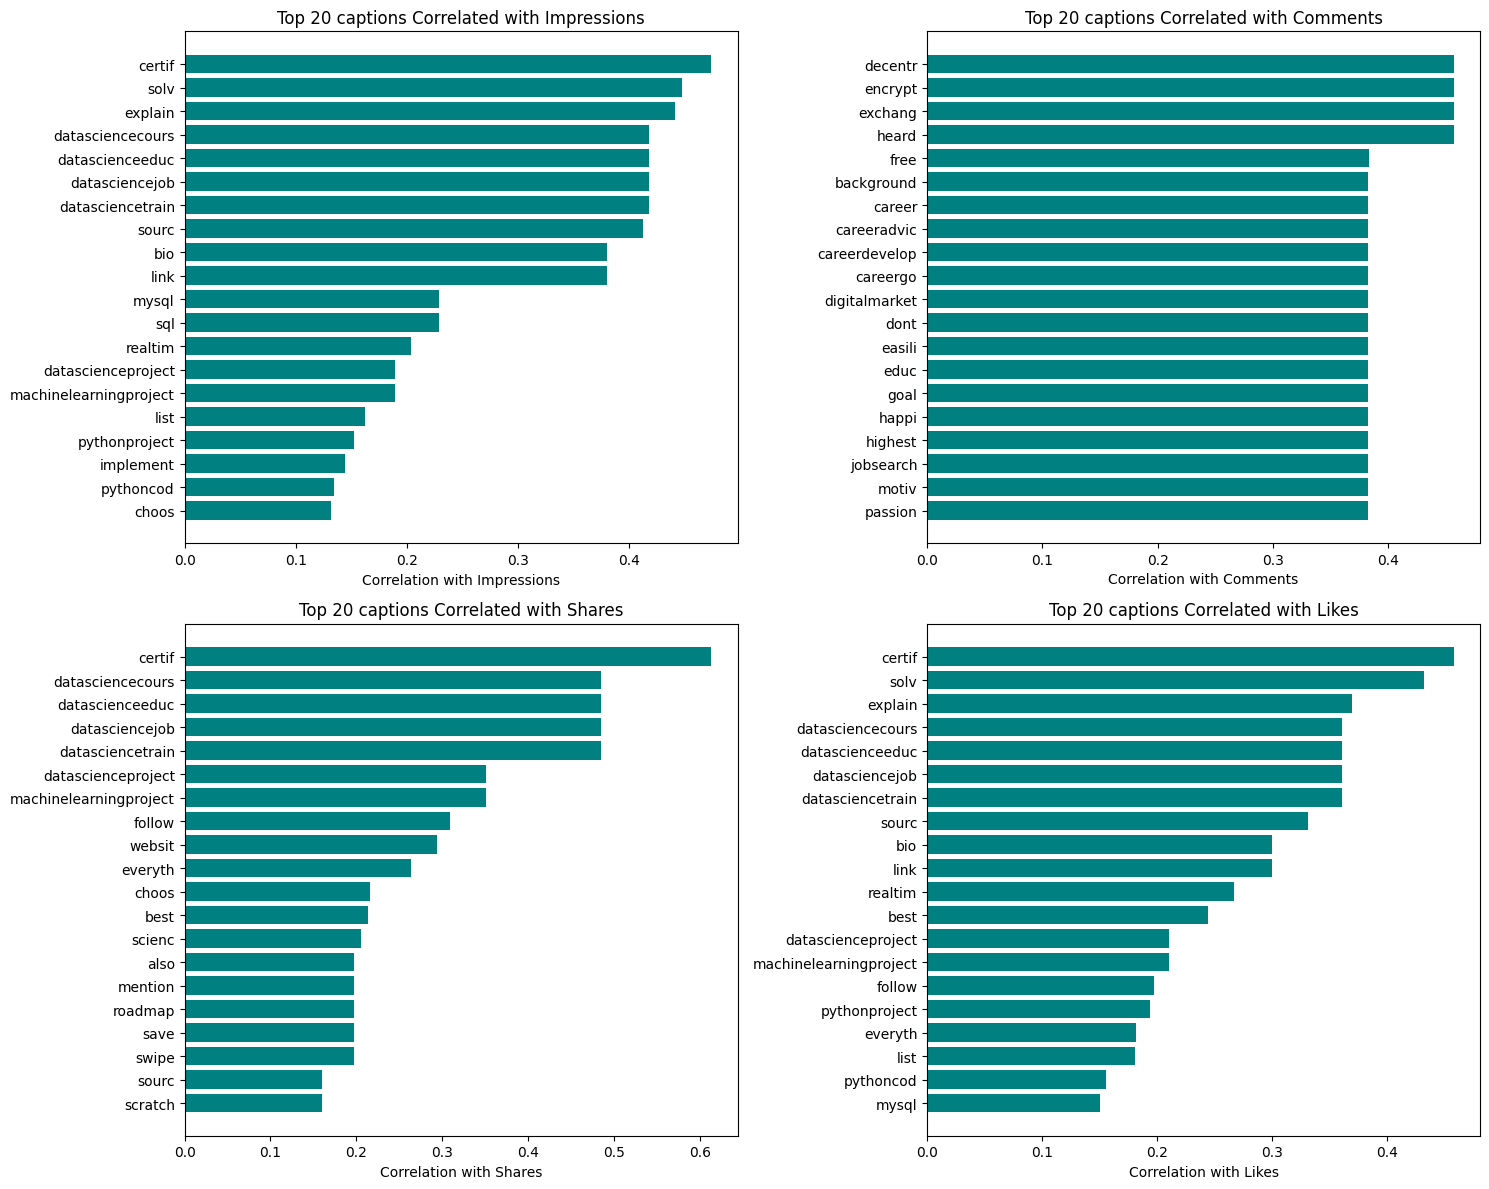

In [8]:

# Create a figure with 4 subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Plot the top 20 words for each metric in each subplot
top20SubBox(axs[0, 0], correlations, 'Impressions', 'captions')
top20SubBox(axs[0, 1], correlations, 'Comments', 'captions')
top20SubBox(axs[1, 0], correlations, 'Shares', 'captions')
top20SubBox(axs[1, 1], correlations, 'Likes', 'captions')

# Adjust layout to prevent overlap and display the figure
plt.tight_layout()
plt.show()


#### 4.3.2 Finding Correlation of Hashtags and likes/comments/shares/impressions `(non-bootstrapped data)`.

In [9]:
# Create an instance of CountVectorizer
vectorizer = CountVectorizer()
# Convert the tokenized captions directly into a document-term matrix
document_term_matrix = vectorizer.fit_transform(captionDF['Hashtags'])

# Convert the matrix to a DataFrame
word_freq_df = pd.DataFrame(document_term_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Add the columns Impressions, Comments, Shares, and Likes to the word_freq_df DataFrame
word_freq_df['Impressions'] = captionDF['Impressions']
word_freq_df['Comments'] = captionDF['Comments']
word_freq_df['Shares'] = captionDF['Shares']
word_freq_df['Likes'] = captionDF['Likes']

# Calculate the correlation between each word and Impressions, Comments, Shares, Likes
correlations = {}

for word in vectorizer.get_feature_names_out():
    correlations[word] = {
        'Impressions': pearsonr(word_freq_df[word], word_freq_df['Impressions'])[0],
        'Comments': pearsonr(word_freq_df[word], word_freq_df['Comments'])[0],
        'Shares': pearsonr(word_freq_df[word], word_freq_df['Shares'])[0],
        'Likes': pearsonr(word_freq_df[word], word_freq_df['Likes'])[0]
    }

# Print the correlations
for word, corr in correlations.items():
    print(f"Word: {word}")
    print(f"  Impressions Correlation: {corr['Impressions']}")
    print(f"  Comments Correlation: {corr['Comments']}")
    print(f"  Shares Correlation: {corr['Shares']}")
    print(f"  Likes Correlation: {corr['Likes']}\n")


Word: ai
  Impressions Correlation: -0.028899391613430137
  Comments Correlation: -0.08650093209906448
  Shares Correlation: -0.02343032311466757
  Likes Correlation: -0.019589884516968997

Word: alexnet
  Impressions Correlation: -0.06653243068688511
  Comments Correlation: -0.017314392384039937
  Shares Correlation: -0.05828857739745496
  Likes Correlation: -0.10412060613815552

Word: algorithm
  Impressions Correlation: 0.039225804610898404
  Comments Correlation: -0.035790248285783186
  Shares Correlation: -0.14947861538267151
  Likes Correlation: 0.01974615261864864

Word: amankharw
  Impressions Correlation: 0.06504132174648543
  Comments Correlation: 0.043111487530633465
  Shares Correlation: 0.05675681350971864
  Likes Correlation: 0.10324984160808273

Word: amazonfind
  Impressions Correlation: -0.07288859350688036
  Comments Correlation: 0.16061752755095207
  Shares Correlation: -0.06977041814874853
  Likes Correlation: -0.13034472156309002

Word: analysi
  Impressions Correl

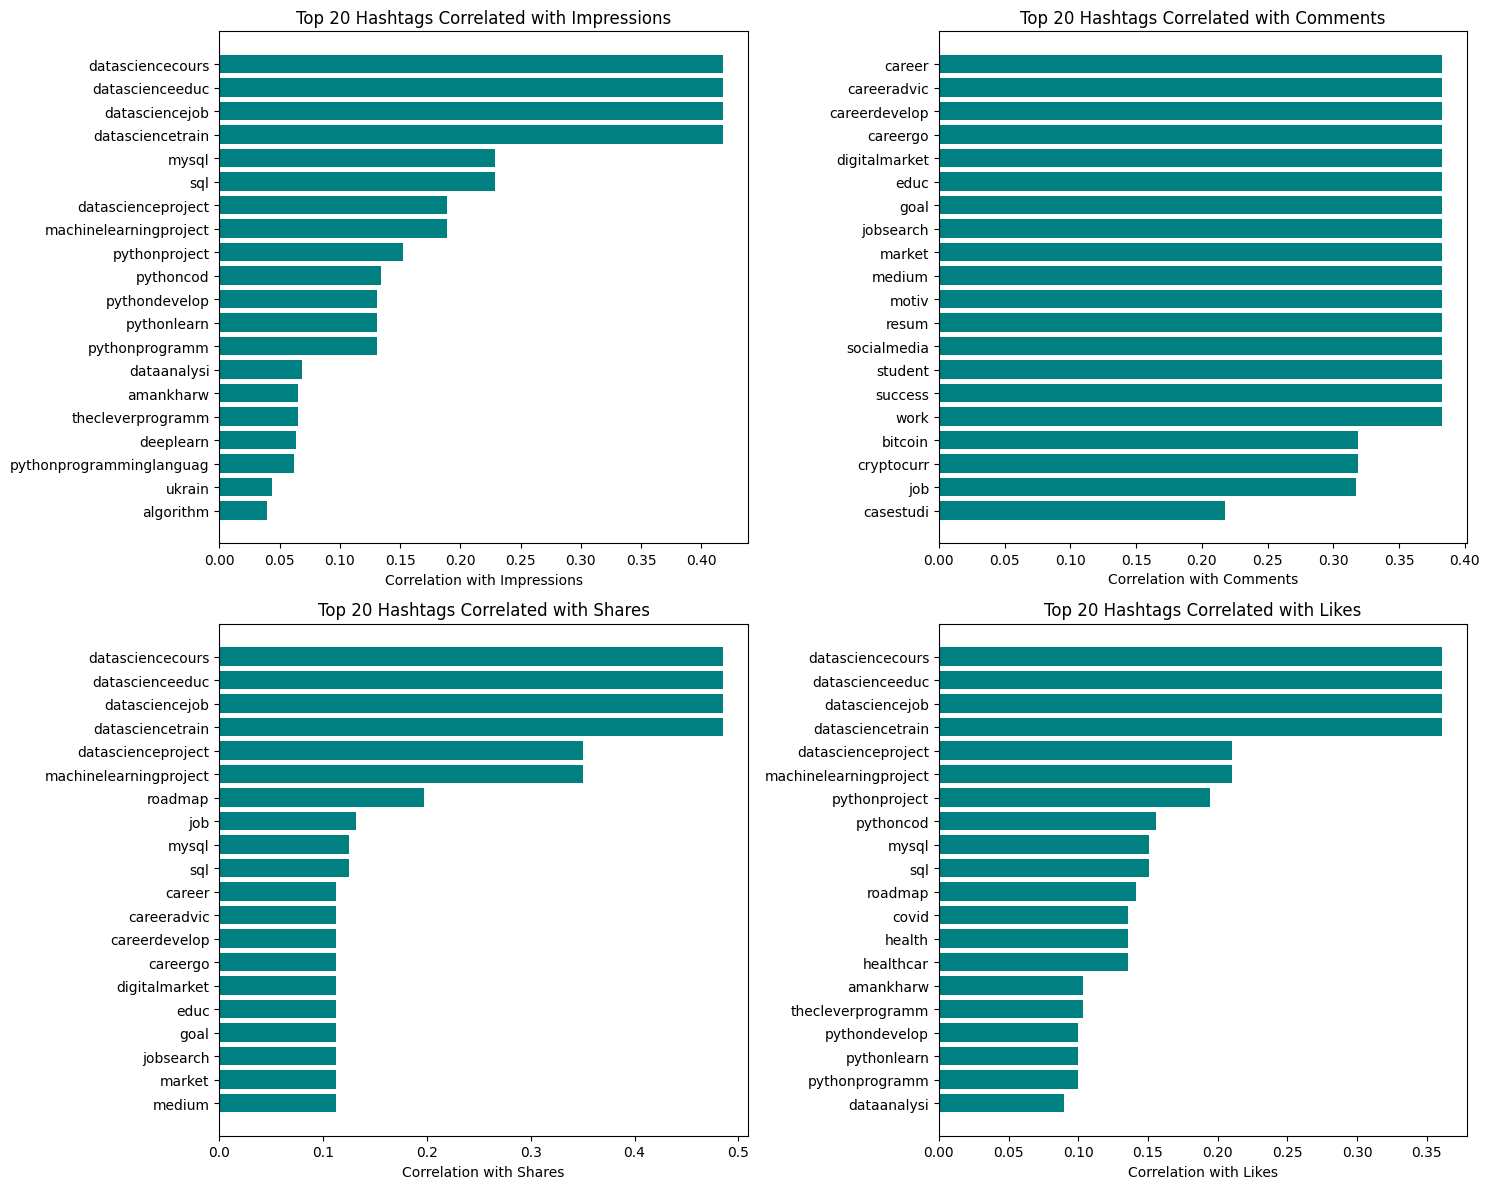

In [10]:
# Create a figure with 4 subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Plot the top 20 words for each metric in each subplot
top20SubBox(axs[0, 0], correlations, 'Impressions','Hashtags')
top20SubBox(axs[0, 1], correlations, 'Comments','Hashtags')
top20SubBox(axs[1, 0], correlations, 'Shares','Hashtags')
top20SubBox(axs[1, 1], correlations, 'Likes','Hashtags')

# Adjust layout to prevent overlap and display the figure
plt.tight_layout()
plt.show()


### 4.4 We are using the Bootstrapped dataset (n=2243) to find the correlation between caption and `likes`, `comments`, `shares`, `impression`.

#### 4.4.1 Finding Correlation of Caption words and Likes/comments/shares/impressions `(bootstrapped data)`.

In [11]:
# Tokenizing captions and calculating correlation with metrics
vectorizer = CountVectorizer()
document_term_matrix = vectorizer.fit_transform(bootstrappedDF['Caption'])
word_freq_df = pd.DataFrame(document_term_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Add engagement metrics to word frequency DataFrame
word_freq_df['Impressions'] = bootstrappedDF['Impressions']
word_freq_df['Comments'] = bootstrappedDF['Comments']
word_freq_df['Shares'] = bootstrappedDF['Shares']
word_freq_df['Likes'] = bootstrappedDF['Likes']

# Calculate correlations and store in a dictionary
correlations = {}
for word in vectorizer.get_feature_names_out():
    correlations[word] = {
        'Impressions': pearsonr(word_freq_df[word], word_freq_df['Impressions'])[0],
        'Comments': pearsonr(word_freq_df[word], word_freq_df['Comments'])[0],
        'Shares': pearsonr(word_freq_df[word], word_freq_df['Shares'])[0],
        'Likes': pearsonr(word_freq_df[word], word_freq_df['Likes'])[0]
    }


# Print the correlations
for word, corr in correlations.items():
    print(f"Word: {word}")
    print(f"  Impressions Correlation: {corr['Impressions']}")
    print(f"  Comments Correlation: {corr['Comments']}")
    print(f"  Shares Correlation: {corr['Shares']}")
    print(f"  Likes Correlation: {corr['Likes']}\n")


Word: abras
  Impressions Correlation: -0.02404035639411597
  Comments Correlation: -0.006666361368931291
  Shares Correlation: -0.01172674082071328
  Likes Correlation: -0.015798195190587554

Word: account
  Impressions Correlation: 0.03488388594261808
  Comments Correlation: 0.014415331991306303
  Shares Correlation: -0.01608216202983074
  Likes Correlation: 0.008508614450797118

Word: accuraci
  Impressions Correlation: 0.030656074783292398
  Comments Correlation: 0.01015489669397302
  Shares Correlation: 0.03941506453578355
  Likes Correlation: 0.024468685005017386

Word: activ
  Impressions Correlation: -0.012878825672341335
  Comments Correlation: -0.027301578510665576
  Shares Correlation: -0.01606076642654357
  Likes Correlation: -0.0313631163944545

Word: ai
  Impressions Correlation: 0.04977168889815998
  Comments Correlation: 0.031315886328851676
  Shares Correlation: -0.0056797458746304765
  Likes Correlation: 0.03606343865316271

Word: aid
  Impressions Correlation: 0.0167

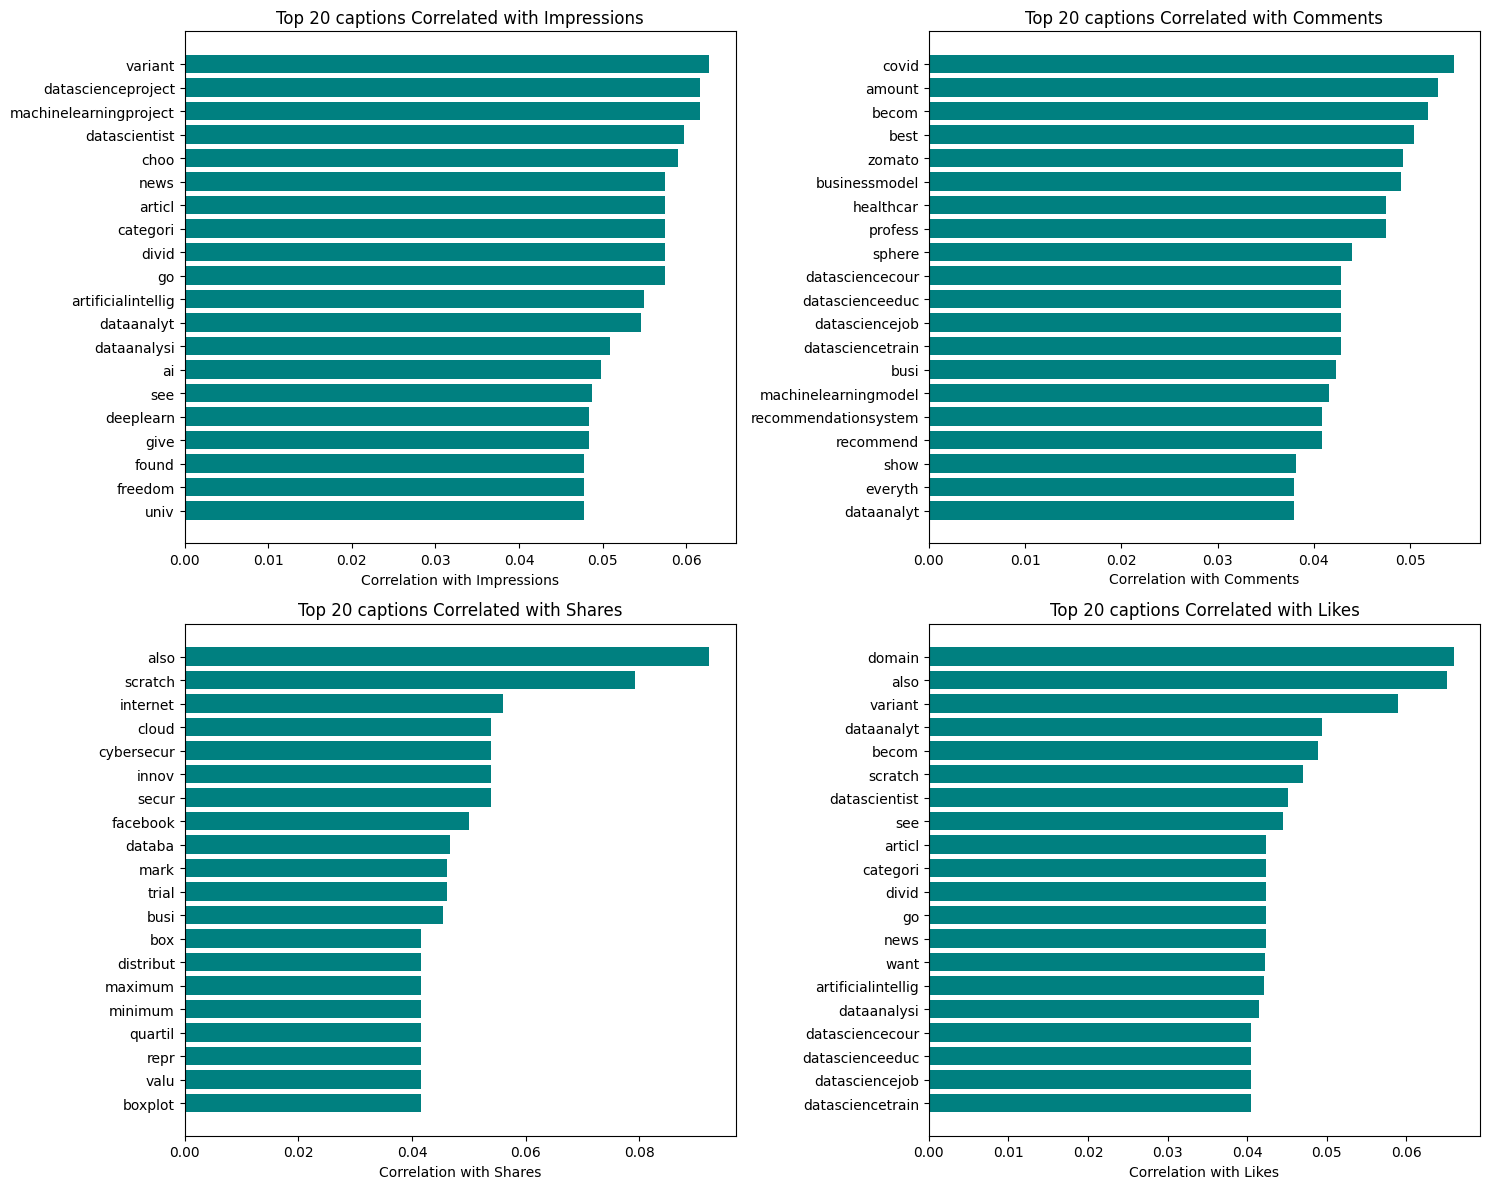

In [12]:

# Create a figure with 4 subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Plot the top 20 words for each metric in each subplot
top20SubBox(axs[0, 0], correlations, 'Impressions', 'captions')
top20SubBox(axs[0, 1], correlations, 'Comments', 'captions')
top20SubBox(axs[1, 0], correlations, 'Shares', 'captions')
top20SubBox(axs[1, 1], correlations, 'Likes', 'captions')

# Adjust layout to prevent overlap and display the figure
plt.tight_layout()
plt.show()

#### 4.4.2 Finding Correlation of Hashtag words and Likes/comments/shares/impressions `(bootstrapped data)`.

In [13]:
# Create an instance of CountVectorizer
vectorizer = CountVectorizer()
# Convert the tokenized captions directly into a document-term matrix
document_term_matrix = vectorizer.fit_transform(bootstrappedDF['Hashtags'])

# Convert the matrix to a DataFrame
word_freq_df = pd.DataFrame(document_term_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Add the columns Impressions, Comments, Shares, and Likes to the word_freq_df DataFrame
word_freq_df['Impressions'] = bootstrappedDF['Impressions']
word_freq_df['Comments'] = bootstrappedDF['Comments']
word_freq_df['Shares'] = bootstrappedDF['Shares']
word_freq_df['Likes'] = bootstrappedDF['Likes']

# Calculate the correlation between each word and Impressions, Comments, Shares, Likes
correlations = {}

for word in vectorizer.get_feature_names_out():
    correlations[word] = {
        'Impressions': pearsonr(word_freq_df[word], word_freq_df['Impressions'])[0],
        'Comments': pearsonr(word_freq_df[word], word_freq_df['Comments'])[0],
        'Shares': pearsonr(word_freq_df[word], word_freq_df['Shares'])[0],
        'Likes': pearsonr(word_freq_df[word], word_freq_df['Likes'])[0]
    }

# Print the correlations
for word, corr in correlations.items():
    print(f"Word: {word}")
    print(f"  Impressions Correlation: {corr['Impressions']}")
    print(f"  Comments Correlation: {corr['Comments']}")
    print(f"  Shares Correlation: {corr['Shares']}")
    print(f"  Likes Correlation: {corr['Likes']}\n")


Word: ai
  Impressions Correlation: 0.049372100093123095
  Comments Correlation: 0.030030495871817744
  Shares Correlation: -0.004114962149175307
  Likes Correlation: 0.03482239365152698

Word: alexnet
  Impressions Correlation: 0.005336717659410843
  Comments Correlation: 0.01750407380999402
  Shares Correlation: -0.039871808465065675
  Likes Correlation: -0.017147459812301657

Word: algorithm
  Impressions Correlation: -0.038741136737915856
  Comments Correlation: -0.012181435296280902
  Shares Correlation: -0.034698932804742254
  Likes Correlation: -0.03211607213854106

Word: amankharw
  Impressions Correlation: 0.00542564117178258
  Comments Correlation: 0.017227728314208147
  Shares Correlation: -0.031025240826644485
  Likes Correlation: 0.011813134492539418

Word: amazonfind
  Impressions Correlation: 0.011404669375896313
  Comments Correlation: 0.030556841511580914
  Shares Correlation: -0.027985132521097737
  Likes Correlation: -0.0044880832430244265

Word: analysi
  Impression

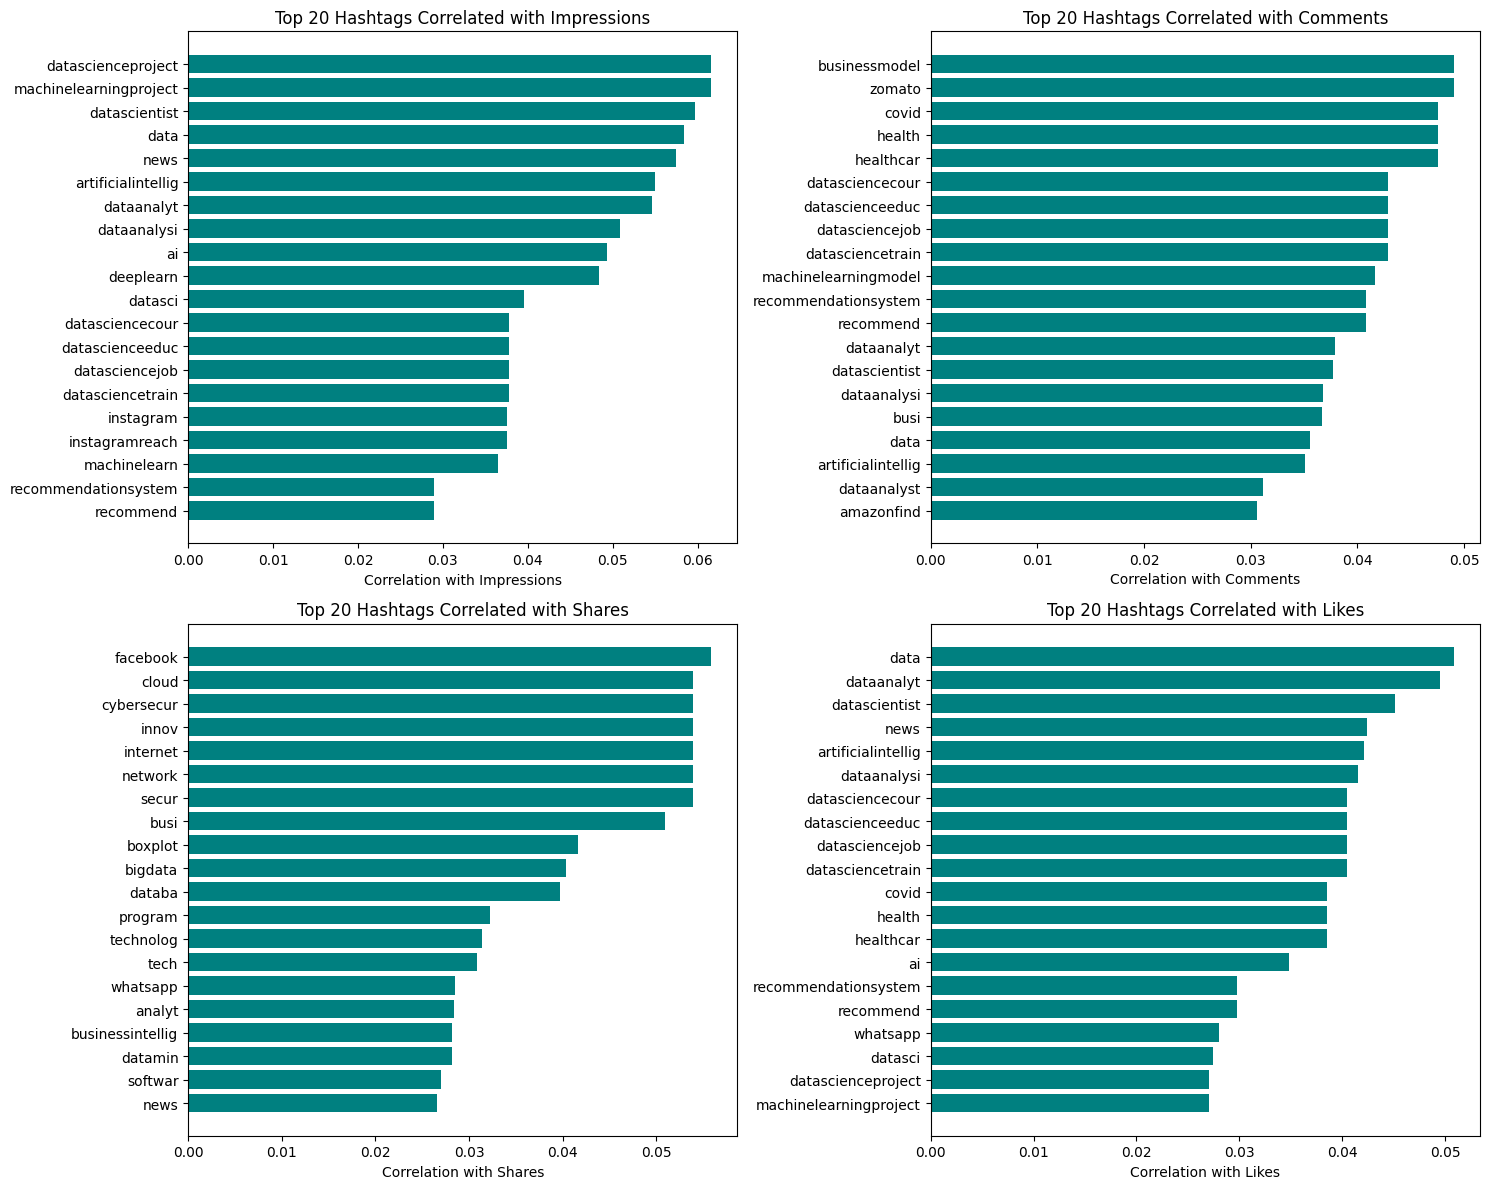

In [14]:
# Create a figure with 4 subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Plot the top 20 words for each metric in each subplot
top20SubBox(axs[0, 0], correlations, 'Impressions','Hashtags')
top20SubBox(axs[0, 1], correlations, 'Comments','Hashtags')
top20SubBox(axs[1, 0], correlations, 'Shares','Hashtags')
top20SubBox(axs[1, 1], correlations, 'Likes','Hashtags')

# Adjust layout to prevent overlap and display the figure
plt.tight_layout()
plt.show()


### 4.5 Conclusion: These words and hashtags can be leveraged to enhance engagement with the target audience.

#### 4.5.1 `(Non-Bootstrapped Data)` Based on the analysis, the top Caption and Hashtags that correlate most strongly with `likes`, `comments`, `shares` and `impression` are as follows:

- **Top Captions for Impressions**: `certif`, solv, explain, datasciencecours, datascienceeduc
- **Top Captions for Comments**: `decentr`, encrypt, exchang, heard, free
- **Top Captions for Shares**: `certif`, datasciencecours, datascienceeduc, datasciencejob, datasciencetrain
- **Top Captions for Likes**: `certif`, solv, explain, datasciencecours, datascienceeduc


- **Top Hashtags for Impressions**: `datasciencecours`, datascienceeduc, datasciencejob, datasciencetrain, mysql
- **Top Hashtags for Comments**: `career`, careeradvic, careerdevelop, careergo, digitalmarket
- **Top Hashtags for Shares**: `datasciencecours`, datascienceeduc, datasciencejob, datasciencetrain, datascienceproject
- **Top Hashtags for Likes**: `datasciencecours`, datascienceeduc, datasciencejob, datasciencetrain, datascienceproject


#### 4.5.2 `(Bootstrapped Data)` Based on the analysis, the top Caption and Hashtags that correlate most strongly with `likes`, `comments`, `shares` and `impression` are as follows:

- **Top Captions for Impressions**: `variant`, datascienceproject, machinelearningproject, datascientist, choo
- **Top Captions for Comments**: `covid`, amount, becom, best, zomato
- **Top Captions for Shares**: `also`, scratch, internet, cloud, cybersecur
- **Top Captions for Likes**: `domain`, also, variant, dataanlyt, becom


- **Top Hashtags for Impressions**: `datascienceproject`, machinelearningproject, datascientist, data, news
- **Top Hashtags for Comments**: `businessmodel`, zomato, covid, health, healthcar
- **Top Hashtags for Shares**: `facebook`, cloud, cybersecur, innov, internet
- **Top Hashtags for Likes**: `data`, datanalyt, datascientist, news, artificialintellig



#### 4.5.3 Addendum
Captions and Hashtags have undergone lemmatization and stemming in `Section 1: Data Extraction`